[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/yue-sun/generative-art/blob/main/tutorials/python_tutorial.ipynb)

# Python Tutorial

This tutorial is based on Python tutorials from previous years MIT IAP Generative Art Workshop ([2022](https://github.com/gvarnavi/generative-art-iap/blob/master/Tutorials/00_python-tutorial-py.ipynb)), Harvard AM111 ([2022](https://github.com/sarah1123/SciComp-F22-AM111/blob/main/00_python_tutorial/python_tutorial.ipynb)), and Harvard AM205 ([2021](https://github.com/chr1shr/am205_g_activities/tree/master/python_tutorial), 2019 and [2017](https://people.math.wisc.edu/~chr/am205/fall17/tutorial.html)). We will cover some basic Python programming topics that will be useful for this mini-course:
- [**Working in a Jupyter notebook**](#working-in-a-jupyter-notebook)
- [Python syntax](#python-syntax)
- [Lists, loops, and iterations](#lists-loops-and-iterations)
    - [Indexing and slicing](#indexing-and-slicing)
    - [Copy and deep copy](#copy-and-deep-copy)
- [Formatted printing](#formatted-printing)
- [Functions and conditionals](#functions-and-conditionals)
- [Scientific computing with `NumPy`](#scientific-computing-with-numpy)
    - [Commonly used attributes](#commonly-used-attributes)
    - [Matrix operations](#matrix-operations)
    - [Make your code efficient](#make-your-code-efficient)
- [Plotting with `matplotlib`](#plotting-with-matplotlib)
    - [Customize your plot](#customize-your-plot)
    - [Animation](#animation)
- [Solving systems of ODEs](#solving-systems-of-odes)
- [Debugging tips](#debugging-tips)


For Python installation and (better) using practice, please check the `README.md` file. 

## **Working in a Jupyter notebook**
During this mini-course, we will be demoing code examples using a Jupyter notebook environment. To run a code cell in the notebook, first select the code cell anywhere with your cursor. You may execute the cell by using the keyboard shortcut Shift+Enter or `Command+Enter`.

Test running the following cell:

In [1]:
pi = 22/7
print("{} is an approximation for pi.".format(pi))

3.142857142857143 is an approximation for pi.


### A quick note about notebooks
Notebooks are a useful way to organize and annotate code especially for demos, support $\LaTeX$ for writing mathematical expressions, and allow code to be executed in smaller blocks (cells) that can help to simplify a large program. However, there are a couple of important points to keep in mind:
- The block structure allows code to be run out of order, so be careful that you've executed your cells in order from top to bottom.
- ***Jupyter notebook remembers your history of running code, even after you delete the code.*** Variables, objects, and functions you define persist throughout your notebook while your session is active, even if you delete the cell(s) that defined them. If you want to delete or rename a variable, make sure you update its occurrences throughout the notebook. You can restart your runtime (go to Kernel -> Restart at the top menu) and run all cells to check for any undefined variables.
- Finally, if you open a notebook from Github using the "Open in Colab" link, it will create a copy for you to edit. Make sure you ***save your notebook to your Google Drive***, or download to your computer if you prefer, to ensure your work is saved!

## Python syntax

Let us start by reviewing the fundamentals of Python syntax. Below are examples of defining variables, doing basic mathematical operations, and printing values. Unlike other programming languages like C++, Python does not require you to declare the type/class of a variable when defining it. Although most of the time, the language is smart enough to handle the conversion between a float and an int, we could run into bugs, e.g., when an int changes to a float. Therefore, when defining variables, we need to be specific about whether we want a float or an int (by adding `.` or `.0`) behind the integer number.

In [2]:
x = 3
y = 6
z = 7.0
print("x is %s, y is %s, and z is %s" % (str(type(x)), str(type(y)), str(type(z))))

x *= y          # modify x in place, same as x=x*y
print("x =", x, "is", type(x))
x += z          # adding a float to an int will change the int to a float
print("x =", x, "is", type(x))

p = x / y       # regular floating point division
q = x // y      # integer division (float and int)
r = int(x) // y # integer division (int and int), results rounded down
s = x % y       # modulo operation
print(p, q, r, s)

a = x**2        # raising to a power, rather than ^
b = x**-0.25
print(a, b)

x is <class 'int'>, y is <class 'int'>, and z is <class 'float'>
x = 18 is <class 'int'>
x = 25.0 is <class 'float'>
4.166666666666667 4.0 4 1.0
625.0 0.4472135954999579


## Lists, loops, and iterations

Lists are a general ordered set whose entries can store values, strings, other lists, objects, etc., and are defined using brackets `[]`. Lists do not always behave the same way as `NumPy` arrays (which we will get to later) and do not follow the same conventions with algebraic operations.

In [3]:
list1 = [1, 4, 9]
list2 = [16, 25, 36, 49]
sq = list1 + list2         # addition means concatenation
sq2 = 2*sq                 # multiplication multiplies the list length, not the values stored!
                           # note that this is very different from the multiplication of numpy arrays
print(sq)
print(sq2)

sum_sq = sum(sq)           # compute the sum of the list (add all elements)
print("Sum of squares: {}".format(sum_sq))

sort_sq = sorted(sq2)      # sort the list in asceding order
print("Sorted double squares: {}".format(sort_sq))

list1.append(0)            # append a new element at the end of the list
print(list1)
print(list1.pop(1), list1) # remove an element based on its index

[1, 4, 9, 16, 25, 36, 49]
[1, 4, 9, 16, 25, 36, 49, 1, 4, 9, 16, 25, 36, 49]
Sum of squares: 140
Sorted double squares: [1, 1, 4, 4, 9, 9, 16, 16, 25, 25, 36, 36, 49, 49]
[1, 4, 9, 0]
4 [1, 9, 0]


A `for` loop can be used to iterate over values in a list. The syntax is `for <iterator> in <sequence>:` followed by an indented line below. There are a few different ways to iterate:

In [4]:
# range(N) for integer N generates a sequence 0, 1, ... N-1 for our iterator i to take on
# More generally, you can specify range(start, stop)
for i in range(len(sq)): 
    print(i, sq[i])

# Another equivalent way is to use the enumerate syntax to achieve the same as above
# i is the index that picks up each element in the list sq
for i, square in enumerate(sq):
    print(i, square)

# Lists are sequences, so the iterator can take on the list values directly
# But, it does not have a counter
for square in sq:
    print("The square is {}".format(square))

# Use enumerate to iterate over values while also incrementing a counter
for i, square in enumerate(sq):
    print("{} squared is {}".format(i+1, square))

0 1
1 4
2 9
3 16
4 25
5 36
6 49
0 1
1 4
2 9
3 16
4 25
5 36
6 49
The square is 1
The square is 4
The square is 9
The square is 16
The square is 25
The square is 36
The square is 49
1 squared is 1
2 squared is 4
3 squared is 9
4 squared is 16
5 squared is 25
6 squared is 36
7 squared is 49


Loops also provide a quick way to create lists as well using list comprehension:

In [5]:
sq = [i**2 for i in range(1,8)]
print(sq)

[1, 4, 9, 16, 25, 36, 49]


### Indexing and slicing

***Python indexing starts from 0*** (this differs from Matlab!), and the last valid index for a list or array of length $N$ is `N-1`. In addition, Python supports negative indexing, so that the index `-1` returns the last entry of the list, `-2` the second to last, and so on.

A slice of a list or array is specified by colon-separated values as `start:stop:skip`. Starting at zero, stopping at the end, and skipping by 1 is the default if any of these values are omitted, as shown in the examples below.

In [6]:
first = sq2[0]         # zero indexes the first entry
last = sq2[len(sq2)-1] # the last index is the length of the list minus 1 (N-1)
last = sq2[-1]         # or, we can use negative indexing, which starts from the end

f3 = sq2[:5]           # first three elements
l4 = sq[-3:]           # last four elements
sl = sq2[3:6]          # an interior slice, slicing is exclusive of the last index, here,
                       # we include entries with indices 3,4,5, for a total of (6-3)=3

a = sq2[:]             # all elements
e2 = sq2[::2]          # every two elements
e12 = sq2[1::2]        # every two elements but start with the first
al = sq2[:-1]          # all but the last
af = sq2[1:]           # all but the first

r = sq2[::-1]          # reversed list with negative skipping

print("First:", first)
print("Last:", last)
print("First three:", f3)
print("Last four:", l4)
print("Interior slice:", sl)
print("All:", a)
print("Every two:", e2)
print("Every two but from first:", e12)
print("All but last:", al)
print("All but first:", af)
print("Reversed:", r)

First: 1
Last: 49
First three: [1, 4, 9, 16, 25]
Last four: [25, 36, 49]
Interior slice: [16, 25, 36]
All: [1, 4, 9, 16, 25, 36, 49, 1, 4, 9, 16, 25, 36, 49]
Every two: [1, 9, 25, 49, 4, 16, 36]
Every two but from first: [4, 16, 36, 1, 9, 25, 49]
All but last: [1, 4, 9, 16, 25, 36, 49, 1, 4, 9, 16, 25, 36]
All but first: [4, 9, 16, 25, 36, 49, 1, 4, 9, 16, 25, 36, 49]
Reversed: [49, 36, 25, 16, 9, 4, 1, 49, 36, 25, 16, 9, 4, 1]


### Copy and deep copy

Assigning a second variable to the same list does not create a new copy of the list - both variables will refer to the same object in memory (this is true for `NumPy` arrays as well). Be careful, as this could lead to unwanted changes to the list!

If you are interested in learning the mechanism of copying (reference, address, object) in Python, you can check this [StackOverflow post](https://stackoverflow.com/questions/17246693/what-is-the-difference-between-shallow-copy-deepcopy-and-normal-assignment-oper).

In [7]:
a = [1, 2, 3] # first list
b = a         # assign a to b
print("b = a\n a: {}; b: {}".format(a, b))

b[0] = 6      # modify b
print("modify b - changes a\n a: {}; b: {}".format(a, b))   # both lists have changed

c = 3*[0]     # create a new list of three zeros:
c[:] = a[:]   # copy all values of a into c. Now, c does not reference the same object as a.
print("c[:] = a[:]\n a: {}; c: {}".format(a, c))

c[2] = 9      # modify c
print("modify c - a unchanged\n a: {}; c: {}".format(a, c)) # a has not changed

# One way to ensure an object and any contained objects are copied:
import copy
d = copy.deepcopy(a)
print("modify d - a unchanged\n a: {}; d: {}".format(a, d*2)) # a has not changed

b = a
 a: [1, 2, 3]; b: [1, 2, 3]
modify b - changes a
 a: [6, 2, 3]; b: [6, 2, 3]
c[:] = a[:]
 a: [6, 2, 3]; c: [6, 2, 3]
modify c - a unchanged
 a: [6, 2, 3]; c: [6, 2, 9]
modify d - a unchanged
 a: [6, 2, 3]; d: [6, 2, 3, 6, 2, 3]


## Formatted printing

The braces `{}` in our print statements are placeholders replaced by values of the variables listed after `.format`. We can specify explicit formatting in the braces as follows:

In [8]:
# Format an integer:
print("{:d} is an approximation for pi".format(3))

# Format a float (default precision):
print("{:f} is an approximation for pi".format(22/7))

# Specify a minimum of 3 total digits of precision,
# with 2 of them after the decimal:
print("{:3.2f} is an approximation for pi".format(22/7))

# Use scientific notation:
sun_mass = 1.989e30
print("The mass of the sun is approximately {:2.1e} kg".format(sun_mass))

3 is an approximation for pi
3.142857 is an approximation for pi
3.14 is an approximation for pi
The mass of the sun is approximately 2.0e+30 kg


You can also format using `'%s %d %.2f' % ('string', int, float)` in print statements. This [page](https://pyformat.info/) compares the two string formatters. (But both are valid options in formatting strings!) 

## Functions and conditionals

Functions are defined using the syntax `def`, and one or more values can be returned via `return`. The function name and arguments are followed by a colon, and the function definition should be indented. Always remember to have a return to your function (unless you are only using functions to refactor the codebase and do not use functions to create variables)!

Conditional statements `if`, `elif`, and `else` are also followed by a colon, and the line below should be indented. Indentation matters!

In [9]:
# Return whether a number is positive, negative, or zero
def sign(a):
    if a > 0:
        return 'positive'
    elif a < 0:
        return 'negative'
    else:
        return 'zero'

x = 5
print("{} is {}".format(x, sign(x)))
y = -2.7
print("{} is {}".format(y, sign(y)))
z = 0
print("{} is {}".format(z, sign(z)))

5 is positive
-2.7 is negative
0 is zero


## Scientific computing with `NumPy`

Matrices and linear algebra make up a significant part of scientific computing. `NumPy` is a fundamental Python library for such computations. We will use it to work efficiently with arrays and matrices, generate random numbers, and access common trigonometric functions and special constants. Let's look at a few simple examples.

In [10]:
import numpy as np # import numpy library and give it an alias (short name)

# Create a 1-D array of zeros of length n
# By default, the values are considered floats
n = 5
x = np.zeros(n)

# Create a 1-D array of ones, of integer type
y = np.ones(n, dtype=np.int32)

# Create n evenly-spaced values on [a,b], inclusive of endpoints by default
a = 1; b = 5
s = np.linspace(a, b, n)

# We can also do the same with creating a range of values
dx = (b - a) / (n - 1)   # compute grid spacing between [a,b] of n points
sa = np.arange(a, b + dx, dx)

# We can also create evenly-spaced values on a logarithmic scale:
g = np.logspace(a, b, n) # n logarithmically spaced values from 10^a to 10^b

# Create a 2-D diagonal matrix, with s on the diagonal:
d = np.diag(s)

# Seed the random number generator, for reproducible results,
# then create an array of random numbers
np.random.seed(12) 
r = np.random.random(n)  # generate n random numbers on the interval [0,1)

# Use trig functions and built in pi.
t = np.cos(4 * np.pi * r)

print("Zeros:", x)
print("Ones:", y)
print("Evenly spaced:", s)
print("Evenly spaced with arange:", sa)
print("Diagonal:\n", d)
print("Random:", r)
print("Trig:", t)

Zeros: [0. 0. 0. 0. 0.]
Ones: [1 1 1 1 1]
Evenly spaced: [1. 2. 3. 4. 5.]
Evenly spaced with arange: [1. 2. 3. 4. 5.]
Diagonal:
 [[1. 0. 0. 0. 0.]
 [0. 2. 0. 0. 0.]
 [0. 0. 3. 0. 0.]
 [0. 0. 0. 4. 0.]
 [0. 0. 0. 0. 5.]]
Random: [0.15416284 0.7400497  0.26331502 0.53373939 0.01457496]
Trig: [-0.35832308 -0.99219278 -0.9860344   0.91145812  0.98327407]


### Commonly used attributes

The following are commonly used attributes of `NumPy` arrays. Notice the distinction between the shapes of a 1-dimensional array, and a 2-dimensional array with a single column. The difference is important when trying to perform certain operations on matrices that require the dimensions to match.

In [11]:
# Access the number of dimensions with .ndim:
x = np.zeros(3)
y = np.zeros((3,1))
z = np.zeros((3,3))
print("x is {:d} dimensional; y is {:d} dimensional; z is {:d} dimensional".format(x.ndim, y.ndim, z.ndim))

# Access the size of each dimension with .shape:
print("x has shape {}; y has shape {}; z has shape {}".format(x.shape, y.shape, z.shape))

# We can reshape x to be 2-dimensional. Here, we specify that we want one column,
# and indicate -1 for the number of rows, which is interpreted as whatever the
# number of rows needs to be in order for x to have a single column.
x = x.reshape((-1,1))
print("x now has shape {}".format(x.shape))

x is 1 dimensional; y is 2 dimensional; z is 2 dimensional
x has shape (3,); y has shape (3, 1); z has shape (3, 3)
x now has shape (3, 1)


### Matrix operations

The standard addition/subtraction, multiplication/division operators act element-wise on matrices. Traditional matrix-matrix or matrix-vector multiplication can be performed via `numpy.dot`:

In [12]:
x = 3 * np.ones((2,2))
y = 6 * np.ones((2,2))
print("x =\n",x)
print("y =\n",y)
print("x + y =\n",x + y)
print("x * y =\n",x * y)
print("np.dot(x, y) =\n", np.dot(x, y))

x =
 [[3. 3.]
 [3. 3.]]
y =
 [[6. 6.]
 [6. 6.]]
x + y =
 [[9. 9.]
 [9. 9.]]
x * y =
 [[18. 18.]
 [18. 18.]]
np.dot(x, y) =
 [[36. 36.]
 [36. 36.]]


The following are a few more useful operations to use when working with `NumPy` arrays:

In [13]:
# Initialize a 3x3 matrix by its values
A = np.array([[-3, 0, 2],
              [1, -4, 0],
              [0, 6, -2]])

# Add A and its transpose, obtaining a symmetric matrix
S = A + A.T

# Compute the eigenvalues and eigenvectors of a symmetric matrix
evals, evecs = np.linalg.eigh(S)

# Find the largest and smallest eigenvalue:
emin, emax = np.min(evals), np.max(evals) # this is a multiple-assignment statement

# Dot two eigenvectors (columns)
d = np.dot(evecs[:,0], evecs[:,1])        # notice syntax of indexing in each dimension
# Dot is sematically equivalent to matmul and @ operator
m = np.matmul(evecs[:,0], evecs[:,1])
at = evecs[:,0] @ evecs[:,1]              # @ is a new feature, for compatibility issues
                                          # with older versions, may want to avoid using

# We can also do SVD
u, s, vt = np.linalg.svd(S)
S_svd = np.dot(np.dot(u, np.diag(s)), vt) # S=USV^T, should be numerically close to S

print("A:\n", A)
print("S:\n", S)
print("eigenvalues:", evals)
print("Min eigenvalue: {:.4f}".format(emin))
print("Max eigenvalue: {:.4f}".format(emax))
print("eigenvectors:\n", evecs)
print("dot:", d)
print("matmul:", m)
print("at:", at)
print("SVD approximated S:\n", S_svd)

A:
 [[-3  0  2]
 [ 1 -4  0]
 [ 0  6 -2]]
S:
 [[-6  1  2]
 [ 1 -8  6]
 [ 2  6 -4]]
eigenvalues: [-12.34607505  -6.6734542    1.01952925]
Min eigenvalue: -12.3461
Max eigenvalue: 1.0195
eigenvectors:
 [[-0.05996963  0.95195085  0.30032186]
 [-0.80362955 -0.22450589  0.55115937]
 [ 0.59210066 -0.2082947   0.77847937]]
dot: -5.2360162667136124e-17
matmul: -5.2360162667136124e-17
at: -5.2360162667136124e-17
SVD approximated S:
 [[-6.  1.  2.]
 [ 1. -8.  6.]
 [ 2.  6. -4.]]


### Make your code efficient

When using Python to do scientific computing, converting your variables to `NumPy` arrays is always more desirable. Since the' NumPy' library is very optimized, calling library functions will make your code much faster. Specifically, you would want to avoid using `for` loops to index through `NumPy` arrays to do operations. Here we look at the timing of computing the sum of the difference between each element using nested loops and vectorized `NumPy` arrays:

In [14]:
# Define function to compute dot product with nested for-loops
def sum_diff_for_loop(a):
    diff = []
    for i in range(len(a)-1):
        i_diff = a[i+1] - a[i]
        diff.append(i_diff)
    return sum(diff)

# Define function to compute dot product with numpy.dot
def sum_diff_numpy(a):
    return np.sum(np.diff(a))

In [15]:
a = range(1, 100000+1)

# %time and %timeit are two other magic commands to measure time of small code snippets
# Note that each machine can have different timing results, e.g.

%time sum_diff_for_loop(a)
# CPU times: user 18.1 ms, sys: 721 µs, total: 18.8 ms
# Wall time: 18.4 ms

%time sum_diff_numpy(a)
# CPU times: user 4.55 ms, sys: 703 µs, total: 5.25 ms
# Wall time: 4.91 ms

CPU times: user 13.4 ms, sys: 932 µs, total: 14.4 ms
Wall time: 13.7 ms
CPU times: user 4.62 ms, sys: 767 µs, total: 5.39 ms
Wall time: 5.2 ms


99999

This [StackOverflow post](https://stackoverflow.com/questions/41325427/numpy-ufuncs-speed-vs-for-loop-speed) also has an interesting discussion on the speed of using `for` loops v.s. `NumPy` built-in functions.

## Plotting with `matplotlib`

The `matplotlib` library provides tools for plotting data, and we import the module `pyplot` under the alias `plt` for short. Specific to notebooks, in order to display our plots inline without typing `plt.show()` all the time, we can add a "magic" command `%matplotlib inline`.

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

Let's generate and plot some example curves.

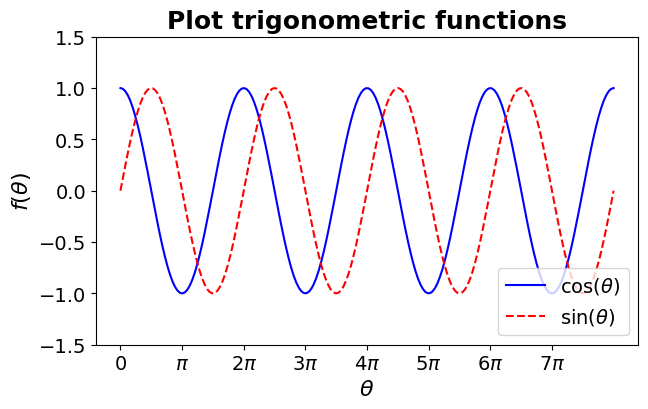

In [17]:
theta = np.linspace(0, 8*np.pi, 200) # 200 evenly-spaced values on [0, 8*pi]
cos = np.cos(theta)
sin = np.sin(theta)

# Create a figure with a single subplot (ax is the axis object)
fig, ax = plt.subplots(1,1, figsize=(7,4))
ax.plot(theta, cos, color='b', label='$\cos(\\theta)$') # can use Latex-style math mode for labels (though there are some differences)
ax.plot(theta, sin, color='r', label='$\sin(\\theta)$', linestyle='dashed') # also changed the linestyle

ax.set_title("Plot trigonometric functions", size=18, fontweight="bold") # change title fontweight
ax.set_xlabel("$\\theta$", size=16)
ax.set_ylabel("$f(\\theta)$", size=16)
ax.tick_params(labelsize=14) # increase tick label size
# ax.axis('equal') # set the scale of both axes the same
ax.set_ylim(-1.5, 1.5) # set y-limits (not compatible with axis('equal'))

# Change axis ticks to multiples of pi
xticks_loc = np.arange(0, 8*np.pi, step=np.pi)
xticks_text = [0, '$\pi$', '$2\pi$', '$3\pi$', \
               '$4\pi$', '$5\pi$', '$6\pi$', '$7\pi$']
ax.set_xticks(xticks_loc, xticks_text)

ax.legend(loc='lower right', fontsize=14)
plt.show() # display the plot

We can also change the scale of (one or more) axes to be logarithmic, which is often useful in numerical analysis.

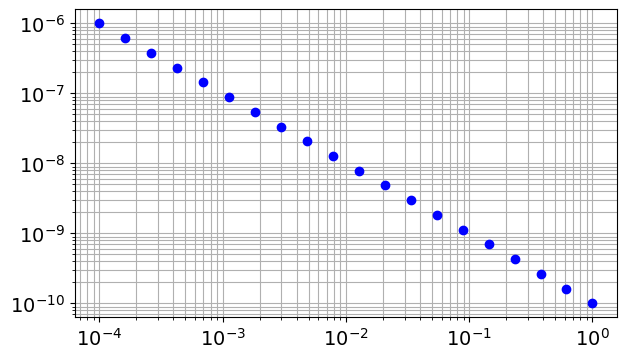

In [18]:
h = np.logspace(-4, 0, 20) # 20 logarithmically spaced values from 10^-4 to 10^0
y = 1e-10 * (h**-1)

fig, ax = plt.subplots(1,1, figsize=(7,4))
ax.scatter(h, y, marker='o', color='b', zorder=3) # higher z order places scatter on top

# Set logarithmic scales on each axis
ax.set_xscale('log')
ax.set_yscale('log')
ax.grid(which='both') # use to turn on both major and minor grid lines

# Note: the minor grid may not display, if the major ticks jump more than one decade/
# the grid would become too crowded

ax.tick_params(labelsize=14)
plt.show()

We can also visualize 2-D arrays as images.

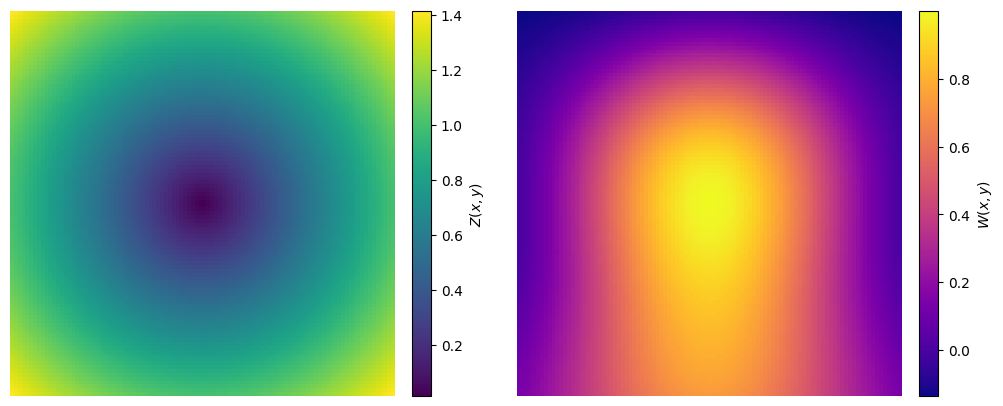

In [19]:
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y) # a meshgrid tiles the 1-D x array into a 2-D array of identical rows,
                         # and tiles the 1-D y array into a 2-D array of identical columns,
                         # producing 2 matrices which store the x and y coordinates, respectively,
                         # for the entire grid

# Evaluate two different functions on the 2D grid
# Each of the operations below act element-wise on the matrix entries of X and Y
Z = np.sqrt(X**2 + Y**2)
W = (1 - (X**2 + Y**3))*np.exp(-(X**2 + Y**2))

# Create two plots side by side on the same figure
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
im1 = ax1.imshow(Z, cmap=plt.cm.viridis) # specify a named colormap (see https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html)
ax1.axis('off')                          # turn off axis markings

# Add a colorbar, specifying to which object colors correspond,
# and next to which axes it should be placed
cbar1 = fig.colorbar(im1, ax=ax1, fraction=0.046, pad=0.04)
cbar1.set_label('$Z(x,y)$')

# The default origin for imshow is in the *upper* left, as matrix column index increases going down,
# but we can set it to lower left to reflect that our y values increase going up
im2 = ax2.imshow(W, cmap=plt.cm.plasma, origin='lower')
ax2.axis('off')
cbar2 = fig.colorbar(im2, ax=ax2, fraction=0.046, pad=0.04)
cbar2.set_label('$W(x,y)$')

plt.show()

We can also visualize matrices as images, which can come in handy in debugging (or visualization).

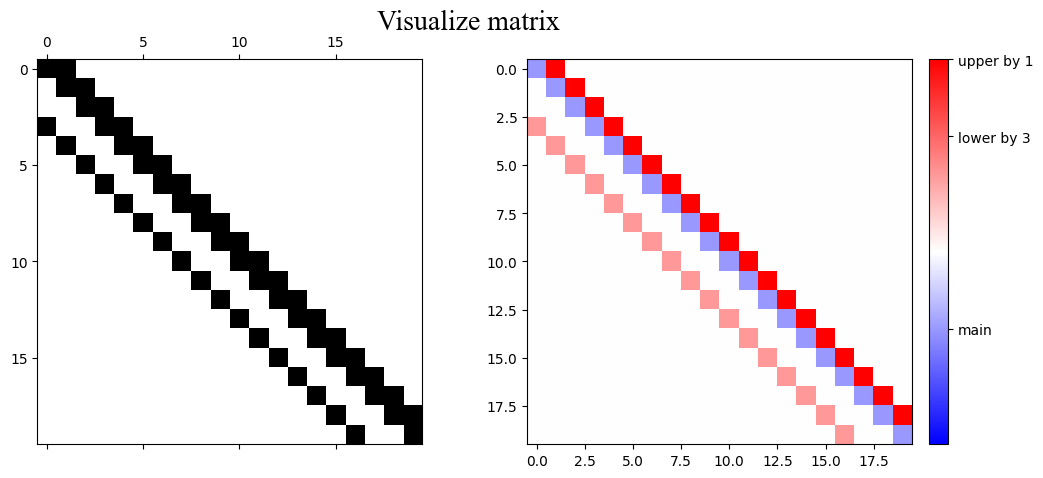

In [20]:
# Initialize a matrix
cd_shape = 20
mat = -2 * np.identity(cd_shape) + np.diag([5] * (cd_shape-1), k=1) + np.diag([2] * (cd_shape-3), k=-3)

# Create two plots side by side on the same figure
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
im1 = ax1.spy(mat) # quick way to preview a matrix through its sparsity pattern
im2 = ax2.imshow(mat, cmap=plt.cm.bwr, vmin=-5, vmax=5)

# Set colorbar ticks
cbar = fig.colorbar(im2, ticks=[-2, 3, 5], fraction=0.046, pad=0.04)
cbar.ax.set_yticklabels(['main', 'lower by 3', 'upper by 1'])

# Set main title for both subplots
fig.suptitle('Visualize matrix', fontsize=20, font='Times New Roman')

plt.show()

### Customize your plot

You can customize your `matplotlib` plot by changing the line style/width/color, marker size/width/symbol, and colormaps (or even make your own colormap). Below are some useful documentations and examples:
- [List of named colors](https://matplotlib.org/stable/gallery/color/named_colors.html)
- [Colormaps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
- [Marker symbols](https://matplotlib.org/stable/api/markers_api.html)
- [Customize your plot with `plt.rcParams` and make colormaps a gradient](https://github.com/zhimingkuang/Harvard-AM-115/blob/main/01_population_single_1/logistic_continuous.ipynb)

You can also create your own colormap using Hex color codes:

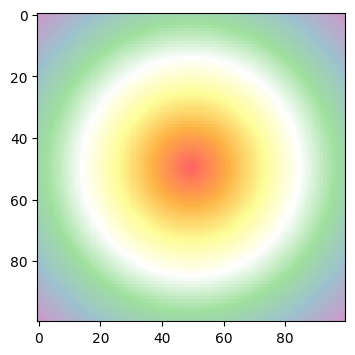

In [21]:
import matplotlib
import matplotlib.cm as cm

# Denote colorbar limits
cmin, cmax = -1.0, 1.0

# Define pastel rainbow color scheme
# https://www.schemecolor.com/pastel-rainbow.php
dc = cmax - cmin
cvals = [cmin, cmin+dc/6., cmin+dc/3., cmin+dc/2., \
         cmin+dc/2.+dc/6., cmin+dc/2.+dc/3., cmax]
colors = ['#FF6663', '#FEB144', '#FDFD97', '#FFFFFF', '#9EE09E', '#9EC1CF', '#CC99C9']
norm = plt.Normalize(min(cvals), max(cvals))
tuples = list(zip(map(norm, cvals), colors))
pastel_rainbow = matplotlib.colors.LinearSegmentedColormap.from_list("", tuples)

# Replot Z with the custom colormap
fig, ax = plt.subplots(1,1, figsize=(7,4))
im = ax.imshow(Z, cmap=pastel_rainbow)
plt.show()

### Animation

You can also make animations with `matplotlib`. See this [Jupyter notebook for how to create an animation](https://github.com/zhimingkuang/Harvard-AM-115/blob/main/04_population_single_3/animate_solution.ipynb).

## Solving systems of ODEs

Many of the interesting systems we will explore, such as strange attractors, reaction-diffusion systems, etc., are solutions to continuous differential equations. We will use **```solve_ivp```** (initial value problem) from `scipy` library to integrate single equations or systems of ordinary differential equations (ODEs).

In [22]:
from scipy.integrate import solve_ivp

Here, we will demonstrate solving the ODE system
$$
    \begin{align}
    \frac{dx}{dt} &= a\sin(\pi t) \\
    \frac{dy}{dt} &= bx + ct
    \end{align}
$$

First, we define a function that takes $t$, $(x,y)$, and any model parameters $(a,b,c)$ as input, and returns the derivatives, $(dx/dt,dy/dt)$. The following is syntax for defining a function:

In [23]:
# Define derivative function
def fun(t, q, a, b, c):
    x = q[0]; y = q[1]          # unpack our two variables
    dxdt = a*np.sin(np.pi*t)
    dydt = b*x + c*t
    return [dxdt, dydt]

Now let us integrate our ODE from $t=0$ to $t=5$. The solver uses adaptive time steps to achieve a desired integration accuracy, so we will ask the solver to interpolate our solution at 200 evenly spaced time points.

In [24]:
ti = 0; tf = 5                         # start time and end time
t_span = [ti, tf]                      # integrate from t=0 to t=5
t_eval = np.linspace(ti, tf, 200)      # generate 200 evenly spaced values of t at which to output solution

a = -1; b = -2; c = 0.5                # define extra parameters
q0 = [1, -1]                           # set initial conditions in the format (x0, y0)

# Plug in all our inputs to solve_ivp and integrate
sol = solve_ivp(lambda t, q: fun(t,q,a,b,c), t_span, q0, t_eval=t_eval)

The `solve_ivp` routine returns an object with the following fields:

In [25]:
sol.t   # the time points at which the solution is evaluated (same as t_eval)
sol.y   # the solution at all requested time points
        # the shape is (number of variables, number of time points) = (2,200) here

x_pts = sol.y[0,:]  # extract all the x-components
y_pts = sol.y[1,:]  # extract all the y-components

Finally we plot the solutions over time:

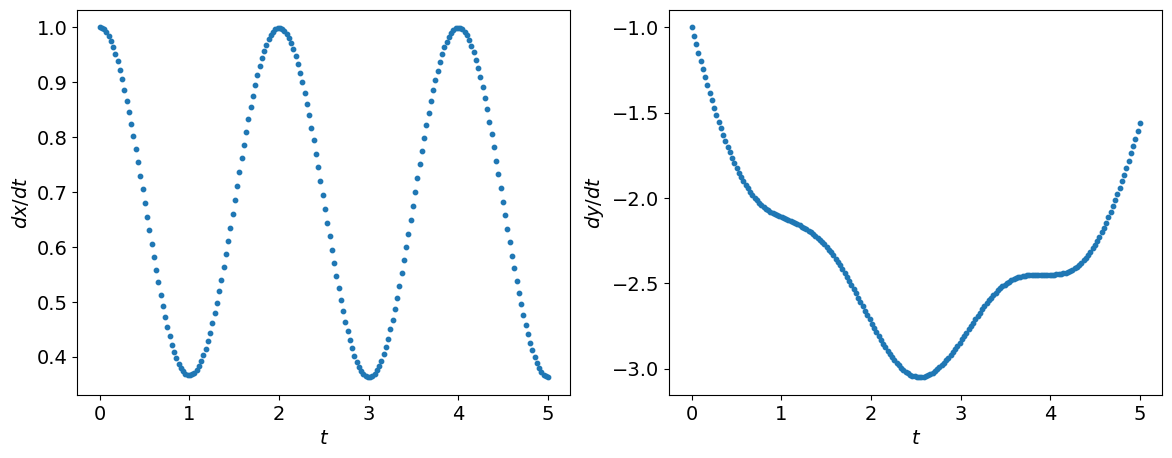

In [26]:
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14,5)) # initialize two figure axes side by side
ax1.scatter(sol.t, x_pts, s=10)  # adjust the size of the scatter points
ax2.scatter(sol.t, y_pts, s=10)

ax1.set_xlabel('$t$', size=14)
ax1.set_ylabel('$dx/dt$', size=14)
ax1.tick_params(labelsize=14)
ax2.set_xlabel('$t$', size=14)
ax2.set_ylabel('$dy/dt$', size=14)
ax2.tick_params(labelsize=14)
plt.show()

## Debugging tips

- Write down relevant equations or pseudocode first
- Modulize your code if the script becomes too long
- Comment your code
- Use breakpoints (in debug mode) or print statements to identify which line of code has an error
- Check you have the correct indexing
- Check you have the correct data structure/type
- Check your matrices have the right shape
- Check your functions have a valid return
- Read the documentation to ensure you are using the function syntax correctly
- Search the error messages online, and often you will find solutions on StackOverflow
- Explain your code to teaching staff/classmates/friends (or a [rubber duck](https://en.wikipedia.org/wiki/Rubber_duck_debugging)!)

## Have fun generating art!